In [1]:
import os
import numpy as np

# If we have BasalGangliaData available, then lets use the newer data
if os.path.isdir("../../../../../BasalGangliaData/data/"):
    os.environ["SNUDDA_DATA"] = "../../../../../BasalGangliaData/data/"
    print(f"Setting SNUDDA_DATA to {os.getenv('SNUDDA_DATA')}")
else:
    print("You need to compile NEURON mechanisms with the alternate path below.")
    
rc = None

Setting SNUDDA_DATA to ../../../../../BasalGangliaData/data/


In [2]:
import os
from snudda.simulate.network_pair_pulse_simulation import SnuddaNetworkPairPulseSimulation
n_dSPN = 5
n_iSPN = 5
n_FS = 2
n_LTS = 2
n_ChIN = 2

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_pulse_simulation")
volume_type="cube"
side_len = 200e-6

In [3]:
pps = SnuddaNetworkPairPulseSimulation(network_path=network_path,
                                       exp_type="Planert2010",
                                       pre_type="FS",
                                       post_type="ALL",
                                       max_dist=max_dist,
                                       hold_voltage=hold_v,
                                       current_injection = cur_inj,
                                       random_seed=123)

Using log file networks/pair_pulse_simulation/log/pair-pulse.log
Checking depolarisation/hyperpolarisation of FS to ALL synapses


In [ ]:
pps.setup(n_dSPN=n_dSPN, n_iSPN=n_iSPN,
          n_FS=n_FS, n_LTS=n_LTS, n_ChIN=n_ChIN,
          volume_type=volume_type,
          side_len=side_len)

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [ ]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

In [ ]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Compile neuron modules. Here the BasalGangliaData is the default, if that is not available use:
```
nrnivmodl ../../../../snudda/data/neurons/mechanisms
```
It is recommended to use BasalGangliaData if available.

In [ ]:
!nrnivmodl ../../../../../BasalGangliaData/data/neurons/mechanisms

To run in parallel instead of the cell below, run this in the ```examples/notebooks/validation/synapses``` folder. 

*OBS* If you change the presynaptic neuron to another type, you need to change the ```--pre FS``` option.
```
mpiexec python3 ../../../../snudda/simulate/network_pair_pulse_simulation.py run Planert2010 networks/pair_pulse_simulation --pre FS
```

In [ ]:
pps.run_sim(gaba_rev=GABA_rev)

Plot results

Loading 16 neurons with 254 synapses and 7 gap junctions
Loading networks/pair_pulse_simulation/simulation/output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.0007308497542880543
Max amp: 0.0025004380750519584
Mean amp: 0.0014373278284939362 +/- 0.0005267229859171808
Amps: [0.00073085 0.00094091 0.00100038 0.00164452 0.00195087 0.00111098
 0.00250044 0.00154404 0.00151296]


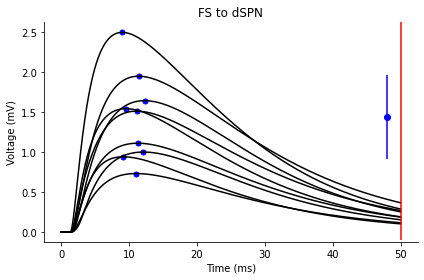

<Figure size 432x288 with 0 Axes>

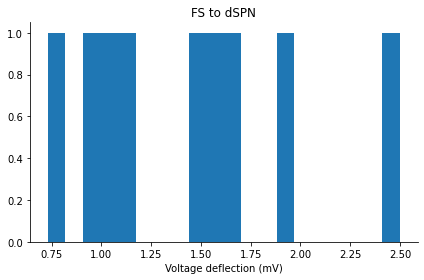

<Figure size 432x288 with 0 Axes>

In [4]:
pps.analyse(post_type="dSPN")

Loading 16 neurons with 254 synapses and 7 gap junctions
Loading networks/pair_pulse_simulation/simulation/output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.0006196429181880847
Max amp: 0.002667543101359915
Mean amp: 0.0017779879145942345 +/- 0.0006981126302472293
Amps: [0.00236752 0.00061964 0.00266754 0.00095382 0.00140267 0.00232433
 0.00201931 0.0012216  0.00242546]


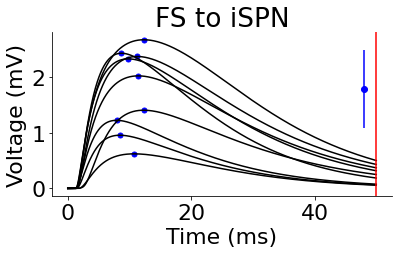

<Figure size 432x288 with 0 Axes>

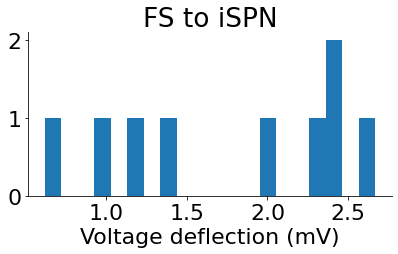

<Figure size 432x288 with 0 Axes>

In [5]:
pps.analyse(post_type="iSPN")